In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Loading the Dataset

In [35]:
social_data = pd.read_csv('E:\Python\Data\Social_Network_Ads.csv')
pd.concat([social_data.head(), social_data.tail()]) # Show first and last 5 rows of the data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


## Exploratory Data Analysis

In [36]:
social_data.isnull().any() # Check for missing values

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

## CountPlot of Purchased

<Axes: xlabel='Purchased', ylabel='count'>

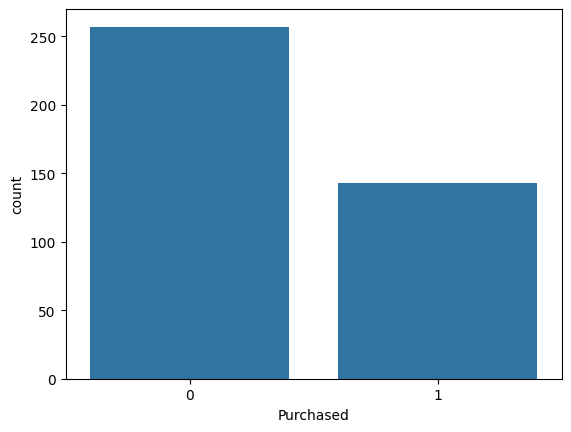

In [37]:
sns.countplot(x = 'Purchased', data = social_data) # Count plot of the target variable

<Axes: xlabel='Purchased', ylabel='count'>

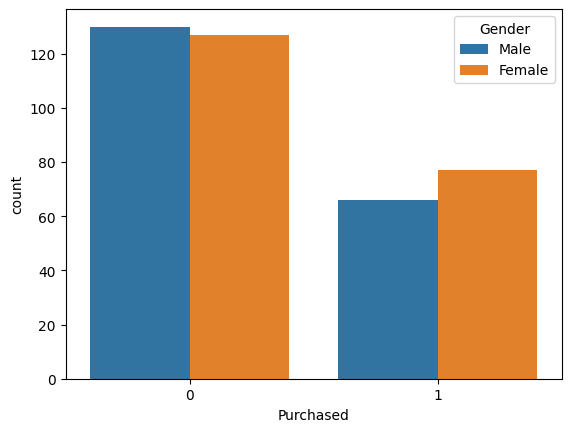

In [38]:
sns.countplot(x = 'Purchased', hue = 'Gender', data = social_data)

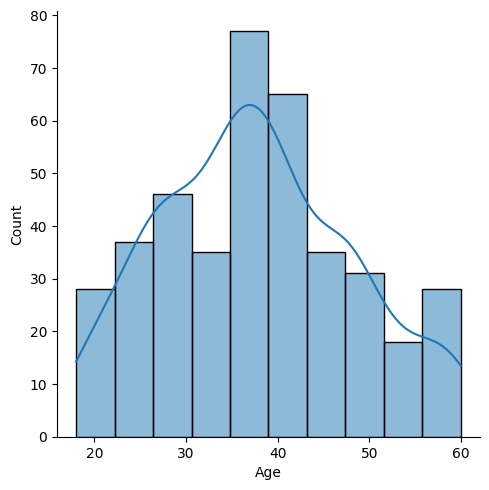

In [39]:
sns.displot(x='Age', data = social_data, kde = True)

## Cleaning the data

In [40]:
social_data.drop('User ID', axis = 1, inplace = True)

In [41]:
social_data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


## Changing Categorical Variables to Dummy Variables

`Purpose of the Dummies Variables`
Dummy variables, also known as one-hot encoded variables, convert categorical information into a binary format (0 or 1). This allows the model to understand the relationship between each category and the outcome variable.
By analyzing the coefficients associated with each dummy variable, we can interpret how belonging to a specific category compared to a reference category (usually the first one) affects the odds of the target event.
2. Increased Model Stability:

Logistic regression relies on linear relationships between variables and the outcome. Categorical variables, if directly included, can be misinterpreted by the model as having a specific order (e.g., "High," "Medium," "Low" might be treated as 1, 2, and 3).
Dummy variables eliminate this confusion and ensure the model treats each category independently, leading to more stable and reliable results.
3. Improved Significance of Coefficients:

By separating the categorical variable into individual effects, dummy coding can help identify which specific categories have a statistically significant impact on the outcome.

In [42]:
gender = pd.get_dummies(social_data['Gender'], drop_first=True) # Create dummy variables for Gender column

In [43]:
social_data.drop('Gender', axis=1, inplace=True) # Drop the original Gender Variable

In [44]:
social_data = pd.concat([social_data, gender], axis=1) # Concatenate the dummy variables with the data  

In [45]:
social_data.head(10)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True
5,27,58000,0,True
6,27,84000,0,False
7,32,150000,1,False
8,25,33000,0,True
9,35,65000,0,False


## Splitting data into Dependent and Indpendent Variables 

In [53]:
X = social_data.iloc[:, [0, 1, 3]] #Age, EstimatedSalary, Male 
X

,Age,EstimatedSalary,Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True
...,...,...,...
395,46,41000,False
396,51,23000,True
397,50,20000,False
398,36,33000,True


In [54]:
y = social_data.iloc[:, 2] #Purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

## Feature Scalling 

Feature scaling is a method used to normalize the range of independent variables. The method enables the independent variables to be in the same range.

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

# Split the data into training and testing sets

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 3)
(120, 3)
(280,)
(120,)


## Fitting the LogisticRegression Model for the Prediction

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
X_test

array([[-0.15807423, -1.07893824,  1.02020406],
       [ 0.12846516, -0.25672226, -0.98019606],
       [-0.15807423,  1.41707457,  1.02020406],
       [ 0.12846516,  1.53453399,  1.02020406],
       [-1.11320552,  1.41707457, -0.98019606],
       [ 0.03295203, -0.13926283, -0.98019606],
       [-1.6862843 , -0.99084367, -0.98019606],
       [ 1.08359645,  0.56549373,  1.02020406],
       [-0.63563988, -1.51941109,  1.02020406],
       [ 0.98808332,  2.09246627,  1.02020406],
       [-0.34910049,  0.06629116, -0.98019606],
       [ 0.12846516,  0.09565602, -0.98019606],
       [-0.25358736,  0.06629116,  1.02020406],
       [ 0.98808332,  1.7988177 , -0.98019606],
       [ 1.46564897,  0.35993973, -0.98019606],
       [ 1.75218836,  1.85754742,  1.02020406],
       [ 2.13424088,  0.38930459,  1.02020406],
       [-1.01769239, -0.34481683,  1.02020406],
       [-0.92217926,  0.50676401, -0.98019606],
       [ 2.13424088,  0.94723686,  1.02020406],
       [ 0.22397829,  0.15438573, -0.980

In [61]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
398,0,0
125,0,0
328,1,1
339,1,1
172,0,0
...,...,...
91,0,0
322,0,0
248,0,0
186,0,0


## Finding Coefficients and Intercept

In [62]:
classifier.coef_

array([[2.3682876 , 1.4292834 , 0.20975091]])

In [63]:
classifier.intercept_

array([-1.13523692])

## Evaluating the Model 

`using predict_proba method to get the probabilities of the classes`

In [66]:
classifier.predict_proba(X)
#It returns the matrix of probabilities that the predicted output is equal to zero or one.
# From the matrix, each row represents a single observation. 
# The first column is the probability that the product is not purchased(1-p(x)), and 
# the second column is the probability that the product is purchased(p(x)).

array([[9.99304897e-01, 6.95102916e-04],
       [9.73648974e-01, 2.63510260e-02],
       [9.93937947e-01, 6.06205288e-03],
       [9.86424685e-01, 1.35753153e-02],
       [9.92448473e-01, 7.55152719e-03],
       [9.78632339e-01, 2.13676606e-02],
       [9.59012027e-01, 4.09879732e-02],
       [3.21158213e-01, 6.78841787e-01],
       [9.95159814e-01, 4.84018641e-03],
       [8.94772779e-01, 1.05227221e-01],
       [9.71987995e-01, 2.80120047e-02],
       [9.91180137e-01, 8.81986297e-03],
       [9.85691867e-01, 1.43081328e-02],
       [9.87532605e-01, 1.24673945e-02],
       [9.92254008e-01, 7.74599169e-03],
       [9.20452924e-01, 7.95470757e-02],
       [6.64911528e-01, 3.35088472e-01],
       [7.49452387e-01, 2.50547613e-01],
       [6.86874999e-01, 3.13125001e-01],
       [6.70569022e-01, 3.29430978e-01],
       [7.79641189e-01, 2.20358811e-01],
       [5.24367754e-01, 4.75632246e-01],
       [4.47080341e-01, 5.52919659e-01],
       [8.43322828e-01, 1.56677172e-01],
       [7.301538

## Using Confusion Matrix

True negatives(TN) in the upper-left position. \
False negatives(FN) in the lower-left position.\
False positives(FP) in the upper-right position.\
True positives(TP) in the lower-right position.

In [68]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[63,  9],
       [14, 34]], dtype=int64)

## using Heatmap

Text(0.5, 23.52222222222222, 'Predicted Label')

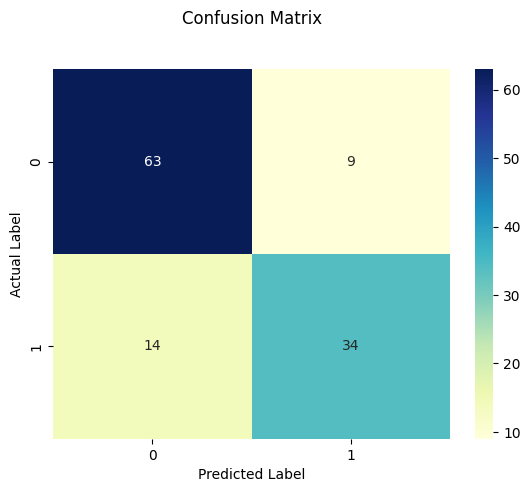

In [69]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

63 TN predictions: zeros predicted correctly.\
14 FN predictions: ones wrongly predicted as zeros.\
9 FP predictions: zeros that were wrongly predicted as ones.\
34 TP predictions: ones predicted correctly.

In [73]:
a = np.array([[65,  3],[ 8, 24]]) ## Creating Heatmap for array...
a

array([[65,  3],
       [ 8, 24]])

<Axes: >

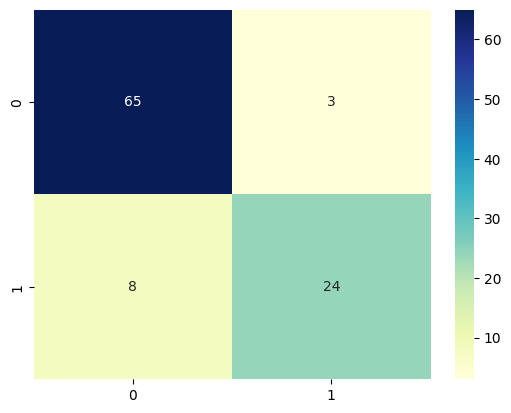

In [74]:
sns.heatmap(pd.DataFrame(a), annot=True, cmap="YlGnBu" ,fmt='g')

## Testing Accuracy Score

In [75]:
accuracy = (63 + 34)/(63 + 34 + 9 + 14)
accuracy

0.8083333333333333

### Next Method

In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8083333333333333

## Classification Report

In [78]:
target_names = ['Will Not Purchase', 'Will Purchase']
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

Will Not Purchase       0.82      0.88      0.85        72
    Will Purchase       0.79      0.71      0.75        48

         accuracy                           0.81       120
        macro avg       0.80      0.79      0.80       120
     weighted avg       0.81      0.81      0.81       120



# Complete Codes for Logistic Regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB
     Actual  Predicted
398       0          0
125       0          0
328       1          1
339       1          1
172       0          0
..      ...        ...
91        0          0
322       0          0
248       0          0
186       0          0
395       1          0

[120 rows x 2 columns]
Confusion Matrix 
 [[63  9]
 [14 34]]
Accuracy of model
80.83333333333333 %
Classification report: 
                    precision    recall  f1-score   support

will NOT PURCHASE       0.82      0.88      0.85        72
    will PURCHASE       0.79      0.71      0.75       

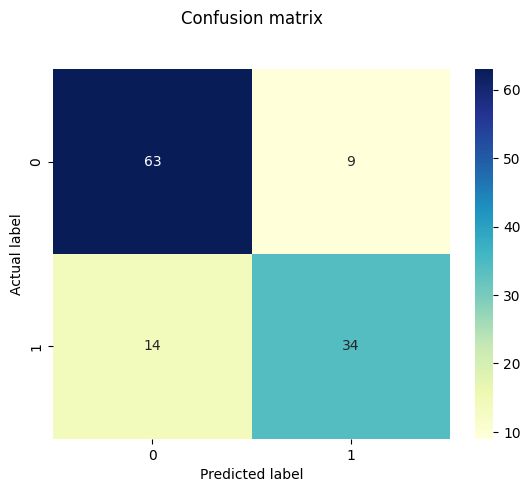

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

social_data = pd.read_csv('E:\Python\Data\Social_Network_Ads.csv')
pd.concat([social_data.head(), social_data.tail()])

#CHECK FOR NULL VALUES
social_data.isnull().any()

# CLEAN THE DATA
social_data.drop('User ID', axis=1, inplace=True)

# CHANGE CATEGORICAL VARIABLE TO DUMMIES
social_data.info()
gender = pd.get_dummies(social_data['Gender'], drop_first=True)
social_data.drop('Gender',axis=1,inplace=True)
social_data = pd.concat([social_data,gender], axis=1)

# SPLIT DATA TO INDEPENDENT AND DEPENDENT VARIABLES
X = social_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
y = social_data.iloc[:, 2] # Purchased

# FEATURE SCALING
sc = StandardScaler()
X = sc.fit_transform(X)

# SPLIT DATA TO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# FIT/TRAIN MODEL
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# PREDICTIONS
y_pred = classifier.predict(X_test)
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(result)

# EVALUATE MODEL
# predic_proba()
# print(classifier.predict_proba(X) # uncheck if needed
#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', cf_matrix)

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Accuracy of model')
print(accuracy_score(y_test,y_pred) * 100, '%')
#0.8083333333333333

# classification report
target_names = ['will NOT PURCHASE', 'will PURCHASE']
print('Classification report: \n', classification_report(y_test, y_pred,target_names=target_names))